<h1 style="text-align: center;">Task-2P: Working with numpy Vectors (Unidimensional Data)</h1>
<h3 style="text-align: right;">Name: Yatharth Deoly</h3>
<h3 style="text-align: right;">StudentId: 224207854</h3>
<h3 style="text-align: right;">EmailId: yatharthdeoly@gmail.com</h3>


## Introduction
Bitcoin(BTC) is a digital currency and first decentralized cryptocurrency launched in January 2009. Bitcoins are generated using the process called mining. Here we will be analysing the BTC ups and down for the year 2023.
Using [BTC-USD](https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD), we have downloaded the data from 2023-01-01 to 2024-01-07.
The `.csv` file which has been downloaded contains data of BTC with features as `Date`, `Open`, `High`, `Low`, `Close`, `Adj Close` and `Volume`. So from this sheet, we will be extracting the `Close` feature for our analysis.
Using MS Excel we have manually removed all features except the `Close` feature after which exported these observations to a CSV file where it contains numbers, one per line.

Defining imports at the top that will be used by the report.
In this case, having all the imports at the top is more intuitive than having some of them at the top and some of them scattered over the file.

In [1]:
import warnings
from datetime import date, timedelta
import numpy as np

# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt

# Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.
import seaborn as sns

# Ignore all warnings generated by the Python program
warnings.filterwarnings("ignore")

# This command tells the IPython environment to draw the plots immediately after the current cell
%matplotlib inline

As we have already formatted the data into a csv file, now we will be extracting data into numpy vector named rates.

In [2]:
# Load data from a text file
rates = np.loadtxt("BTC-USD.csv", delimiter=",")

As we are analysing data for Q3 of 2023, we will be extracting data from vector for 182 days to 273 days inclusive.

In [3]:
# As in python index starts from 0, so will be taking 181 to 273 for slicing.
rates_q3 = rates[181:273]
rates_q3.shape

(92,)

As we have extracted Q3 data, now we will be calculating different aggregation data. These data we can use for our further analysis.

In [4]:
def calculate_aggregates(vector):
    """
    This method will be calculating different aggregation data for provided vector.

    :param vector: array_like, Array containing numbers.
    """

    def round_value_2_decimal(val):
        """
        Round the given value to the 2 decimals places.

        :param val: numerical value provided, like 5.51678

        :return: 2 decimal rounded value, like 5.52
        """
        return np.round(val, 2)

    # Computing the 25-th quantile of the data.
    q1 = np.quantile(vector, 0.25)

    # Computing the 75-th quantile of the data.
    q3 = np.quantile(vector, 0.75)

    # Computing the arithmetic mean
    print(f'Arithmetic Mean: {round_value_2_decimal(np.mean(vector))}')

    # Computing the minimum of an array
    print(f'Minimum data: {round_value_2_decimal(np.min(vector))}')

    # Representing the first quartile
    print(f'First quartile, i.e. Q1: {round_value_2_decimal(q1)}')

    # Computing the median of the array elements
    print(f'Median: {round_value_2_decimal(np.median(vector))}')

    # Representing the third quartile
    print(f'Third quartile, i.e. Q3: {round_value_2_decimal(q3)}')

    # Computing the maximum of an array
    print(f'Maximum data: {round_value_2_decimal(np.max(vector))}')

    # Computing the standard deviation of an array
    print(f'Standard Deviation: {round_value_2_decimal(np.std(vector))}')

    # Representing inter quartile range
    print(f'Inter Quartile Range(IQR): {round_value_2_decimal(q3 - q1)}')


calculate_aggregates(rates_q3)

Arithmetic Mean: 28091.33
Minimum data: 25162.65
First quartile, i.e. Q1: 26225.56
Median: 28871.82
Third quartile, i.e. Q3: 29767.07
Maximum data: 31476.05
Standard Deviation: 1827.04
Inter Quartile Range(IQR): 3541.51


As we are understanding the data, now we will be using graphical visualisation for more clarity.

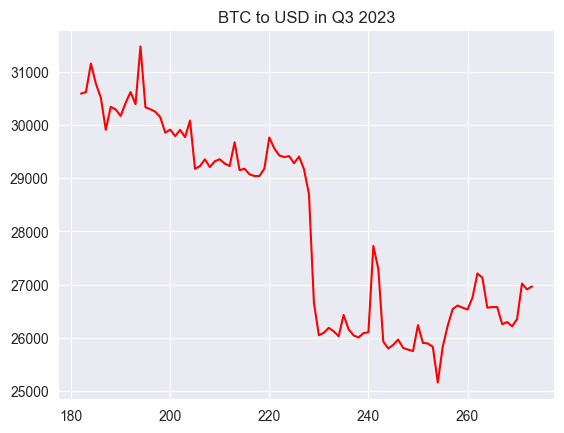

In [5]:
# Creating a range on days
days = np.arange(182, 274)

# Draw line plot
sns.lineplot(x=days, y=rates_q3, color='red')

# Declaring title for plot
plt.title("BTC to USD in Q3 2023")

# Show the chart
plt.show()

As per the visualization, we can derive:
- There was a significant drop in `close` rates of BTC from day-228 to day-229, as price dropped from 28.7k to 26.6k.
- For Q3, day-194 has the highest observed price and day-254 has the lowest observed price, with `close` price as 31.4k and 25.1k respectively.

In [6]:
def days_to_date(day, year=2023, quarter=3):
    """
    Converts a day number to a date in a particular year and quarter, where default
    data is 2023 for year and 3 for quarter.

    Args:
      day: The day number to convert.
      year: The year to convert the date to.
      quarter: The quarter to convert the date to.

    Returns:
      A string formatted date.
    """
    # Get the first day of the quarter.
    first_day_of_quarter = date(year, quarter * 3 - 2, 1)

    # Add the day number to get the converted date.
    return str(first_day_of_quarter + timedelta(days=int(day)))

In [7]:
# Computing lowest observed price in Q3 2023
print(
    f"Lowest price was on day {182 + np.argmin(rates_q3)}, dated {days_to_date(np.argmin(rates_q3))} with price as ({np.min(rates_q3)})")

Lowest price was on day 254, dated 2023-09-11 with price as (25162.6543)


In [8]:
# Computing highest observed price in Q3 2023
print(
    f"Highest price was on day {182 + np.argmax(rates_q3)}, dated {days_to_date(np.argmax(rates_q3))} with price as ({np.max(rates_q3)})")

Highest price was on day 194, dated 2023-07-13 with price as (31476.04883)


Now will be checking for outliers using box plot.
An outlier is a data point that is numerically distant from the rest of the data. In a box plot, an outlier is a data point that is located outside the whiskers.
A box plot is a special type of diagram that shows the quartiles in a box and the line extending from the lowest to the highest value.

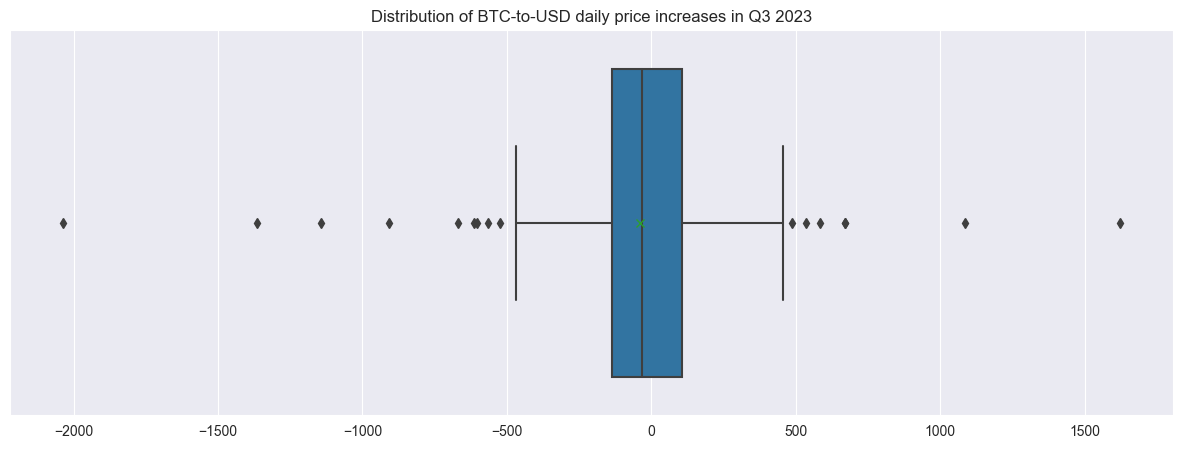

In [9]:
# Calculating Q3 2023 daily price increases/decreases
rates_q3_diff = np.diff(rates_q3)

# set the figure size
plt.figure(figsize=(15, 5))

# Creating box plot with mean value marker
sns.boxplot(x=rates_q3_diff, showmeans=True, meanprops={"marker": "x", "color": "green"})

# Declaring title for plot
plt.title("Distribution of BTC-to-USD daily price increases in Q3 2023")

# Display plot
plt.show()

As per the visualization, we can derive:
- There are outliers in both sides of whiskers.
- Mean is close to median.

Now we will be driving the number of outliers in the derived vector using programmatically way.

In [10]:
def count_outliers(vector):
    """
    This method will compute number of outliers present in provided vector.

    :param vector: array_like, Array containing numbers.
    :return: numerical value, Number of outlier present.
    """
    q25 = np.quantile(vector, 0.25)
    q75 = np.quantile(vector, 0.75)
    iqr = q75 - q25

    return np.sum((vector < q25 - 1.5 * iqr) | (vector > q75 + 1.5 * iqr))


print(f'There are {count_outliers(rates_q3_diff)} outliers.')

There are 16 outliers.


Outliers in BTC Q3-2023 data of daily close price increases/decreases can potentially indicate significant events or changes in market sentiments.
- Due to the event "Rising U.S. Bond Yields" caused a sudden drop in prices, which can contribute to outliers.
- Due to some events or news, profit-booking can also make sudden drop in prices.

## Summary
In this report we have worked with Bitcoin(BTC) historical data of year 2023 of Q3 quarter, where we have done our analysis on the `Close` feature, with different aggregation data, graphical visualization and calculating outliers.
As currently we have taken over a year of data, for a far better understanding we need to include more features with more data, which can help in better analysis.